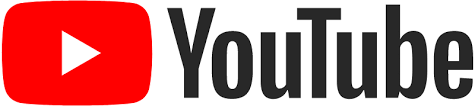

# YouTube Video Anlysis in US and Canada
Here we will analyze trending YouTube videos in the United States and Canada. Additoinally, we will explore Korean YouTube trending videos.

## Table of Contents
### 1. Data Cleaning
### 2. Data Analysis and Visualization
    2.1 Most trending categories in YouTube <br>
    2.2 Top 20 the Most Liked Videos <br>
    2.3 How long does it take to start trending? <br>
    2.4 Published Time of Trending Videos <br>
    2.5 Most Viewed Videos in Each Category <br>
    2.6 Most Disliked, Controversial Videos <br>

### 3. Word Cloud
    3.1 Title from People & Blogs <br>   
### 4. Conclusion

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re

In [2]:
us = pd.read_csv('USvideos.csv')
ca = pd.read_csv('CAvideos.csv')

In [3]:
us.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


In [4]:
us.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [5]:
us.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

## 1. Data Cleaning

**_Change all date columns to datetime objects._**

In [6]:
us['trending_date'] = pd.to_datetime(us['trending_date'], format='%y.%d.%m')
us['publish_time'] = pd.to_datetime(us['publish_time'])

In [7]:
us['publish_date'] = pd.to_datetime(us['publish_time']).dt.date
us['publish_time'] = pd.to_datetime(us['publish_time']).dt.time

In [8]:
us['publish_date'] = pd.to_datetime(us['publish_date'])

In [9]:
ca['trending_date'] = pd.to_datetime(ca['trending_date'], format='%y.%d.%m')
ca['publish_time'] = pd.to_datetime(ca['publish_time'])

In [10]:
ca['publish_date'] = pd.to_datetime(ca['publish_time']).dt.date
ca['publish_time'] = pd.to_datetime(ca['publish_time']).dt.time
ca['publish_date'] = pd.to_datetime(ca['publish_date'])

**_We will change category id numbers to categories._**

In [13]:
categories = {2: 'Autos & Vehicles', 1: 'Film & Animation', 10: 'Music', 15: 'Pets & Animals', 
              17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging',
              22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style',
              27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 
              31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 
              36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller',
              42: 'Shorts', 43: 'Shows', 44: 'Trailers'}

In [14]:
us['category_id'] = us['category_id'].map(categories)
ca['category_id'] = ca['category_id'].map(categories)

## 2. Data Analysis and Visualization
### 1) Most trending categories in YouTube

In [15]:
most_trending_cat_us = us['category_id'].value_counts().to_frame()\
                    .reset_index().rename(columns={'index':'Category', 'category_id':'Counts'})[:10]
most_trending_cat_ca = ca['category_id'].value_counts().to_frame()\
                    .reset_index().rename(columns={'index':'Category', 'category_id':'Counts'})[:10]

In [16]:
fig = go.Figure()
fig.add_trace(go.Bar(x=most_trending_cat_us['Category'], y=most_trending_cat_us['Counts'],
                     name='United States', marker_color='lightskyblue'))
fig.add_trace(go.Bar(x=most_trending_cat_ca['Category'], y=most_trending_cat_ca['Counts'],
                     name='Canada', marker_color='crimson'))

fig.update_layout(barmode='group', xaxis_tickangle=-45, template='none',
                 title='Most Trending Categories in US and CA')
fig.show()

### 2) Top 20 the Most Liked Videos
#### a. US

In [17]:
top20_likes_us = us.sort_values(by='likes', ascending=False)[:20]

In [18]:
fig = px.scatter(top20_likes_us, x="likes", y="views", size="comment_count", color="title",
                 hover_name="title", log_x=True, size_max=50, labels={'title':''})
fig.update_layout(template='none', title='Top 20 the Most Liked Videos in the US')
fig.show()

#### b. Canada

In [19]:
top20_likes_ca = ca.sort_values(by='likes', ascending=False)[:20]

In [20]:
fig = px.scatter(top20_likes_ca, x="likes", y="views", size="comment_count", color="title",
                 hover_name="title", log_x=True, size_max=50, labels={'title':''})
fig.update_layout(template='none', title='Top 20 the Most Liked Videos in the CA')
fig.show()

**_Interestingly, Korean boy band BTS has the most liked videos in both US and Canada. Here we will also check Korean YouTube to see if it is the same._**

### 3) How long does it take to start trending?
#### a. US

In [21]:
us['days_to_trend'] = us['trending_date'] - us['publish_date']
us['days_to_trend'] = us['days_to_trend'].dt.days

In [22]:
days_to_trend = us.groupby('days_to_trend').count()['video_id'].to_frame()\
                .reset_index().sort_values('video_id', ascending=False)[:15]\
                .rename(columns={'days_to_trend':'Days Took', 'video_id': 'Counts'}).reset_index(drop=True)
days_to_trend = days_to_trend.sort_values('Days Took')

In [23]:
fig = px.bar(days_to_trend, x='Days Took', y='Counts', color='Counts', height=500,
            labels={'Counts':'Number of Trending Videos'}, color_continuous_scale=px.colors.sequential.Blues)
fig.update_layout(template='none', title='Number of Days Took for Videos to Trend')
fig.update_yaxes(showgrid=False)
fig.show()

#### b. Canada

In [24]:
ca['days_to_trend'] = ca['trending_date'] - ca['publish_date']
ca['days_to_trend'] = ca['days_to_trend'].dt.days

In [25]:
days_to_trend_ca = ca.groupby('days_to_trend').count()['video_id'].to_frame()\
                .reset_index().sort_values('video_id', ascending=False)[:10]\
                .rename(columns={'days_to_trend':'Days Took', 'video_id': 'Counts'}).reset_index(drop=True)
days_to_trend_ca = days_to_trend_ca.sort_values('Days Took')

In [26]:
fig = px.bar(days_to_trend_ca, x='Days Took', y='Counts', color='Counts', height=500,
            labels={'Counts':'Number of Trending Videos'}, color_continuous_scale=px.colors.sequential.OrRd)
fig.update_layout(template='none', title='Number of Days Took for Videos to Trend')
fig.update_yaxes(showgrid=False, title='')
fig.show()

**_The chart shows that it usually takes from 2 to 6 days for videos to trend in the US, but interesingly in Canada, although the number of videos is much higher than the US, it only takes from 1-2 days for videos to Trend._**

### 4) Published Time of Trending Videos

In [27]:
us['published_hour'] = pd.to_datetime(us['publish_time'], format='%H:%M:%S').dt.hour
us['published_hour'] = pd.to_datetime(us['published_hour'], format='%H').dt.time
published_hour_us = us.groupby('published_hour').count()['video_id'].to_frame().reset_index()
published_hour_us['published_hour'] = published_hour_us['published_hour'].apply(lambda x: x.strftime('%I:%M %p'))
published_hour_us = published_hour_us.rename(columns={'published_hour': 'Published Time', 'video_id': 'Counts'})

In [28]:
ca['published_hour'] = pd.to_datetime(ca['publish_time'], format='%H:%M:%S').dt.hour
ca['published_hour'] = pd.to_datetime(ca['published_hour'], format='%H').dt.time
published_hour_ca = ca.groupby('published_hour').count()['video_id'].to_frame().reset_index()
published_hour_ca['published_hour'] = published_hour_ca['published_hour'].apply(lambda x: x.strftime('%I:%M %p'))
published_hour_ca = published_hour_ca.rename(columns={'published_hour': 'Published Time', 'video_id': 'Counts'})

In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=published_hour_us['Published Time'], y=published_hour_us['Counts'],
                         mode='lines', name='US', line=dict(color='royalblue'),
                         hovertemplate='Counts: %{y}'))
fig.add_trace(go.Scatter(x=published_hour_ca['Published Time'], y=published_hour_ca['Counts'],
                         mode='lines', name='Canada', line=dict(color='firebrick'), 
                         hovertemplate='Counts: %{y}'))
fig.update_layout(template='none', title='Published Time of Trending Videos in US and Canada',
                 yaxis_title='Number of Videos')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### 5) Most Viewed Videos in Each Category
#### a. US

In [30]:
us_grouped = us.groupby(['category_id', 'title']).sum()[['views']]
us_grouped = us_grouped.reset_index().sort_values(['views']).drop_duplicates('category_id', keep='last')

In [31]:
fig = px.sunburst(us_grouped, path=['category_id', 'title'], values='views', height=700,
                 color='views', color_continuous_scale='PuBu')
fig.update_layout(title='Most Viewed Videos in the US')
fig.show()

#### b. Canada

In [32]:
ca_grouped = ca.groupby(['category_id', 'title']).sum()[['views']]
ca_grouped = ca_grouped.reset_index().sort_values(['views']).drop_duplicates('category_id', keep='last')

In [33]:
fig = px.sunburst(ca_grouped, path=['category_id', 'title'], values='views', height=700,
                 color='views', color_continuous_scale='PuRd')
fig.update_layout(title='Most Viewed Videos in the US')
fig.show()

**_Interestingly, in both countries, Childish Gambino's "This is America" music video has the highest view in Music Category._**

### 6) Most Disliked, Controversial Videos
#### a. US

In [34]:
most_disliked = us.sort_values(by='dislikes', ascending=False)[:50].drop_duplicates(subset='video_id')
most_disliked = most_disliked.rename(columns={'title': 'Title', 'channel_title': 'Channel Title',
                              'dislikes': 'Number of Dislikes'})

In [35]:
fig = go.Figure(data=[go.Table(header=dict(values=list(most_disliked[['Channel Title', 'Title', 'Number of Dislikes']]),
                                           fill_color='gainsboro', align='left'),
                               cells=dict(values=[most_disliked['Channel Title'], most_disliked['Title'],
                                                  most_disliked['Number of Dislikes']],
                                          fill_color='aliceblue', align='left'))])
fig.update_layout(title='Most Disliked Videos on US Youtube')
fig.show()

#### By dislike-percentage, which is caluclated as (dislikes) / (all likes) * 100

In [36]:
us['dislike_percentage'] = us['dislikes']/(us['likes'] + us['dislikes'])
us_over_million_view = us.loc[us['views'] > 1000000]
videos_disliked = us_over_million_view.sort_values(by='dislike_percentage', ascending=False)
videos_disliked = videos_disliked.dropna(subset=['dislike_percentage'])

In [37]:
top10_videos_disliked = videos_disliked.drop_duplicates(subset='title')[:10]
top10_videos_disliked = top10_videos_disliked.rename(columns={'title': 'Title', 'channel_title': 'Channel Title', 
                                                              'category_id': 'Category',
                                                              'dislike_percentage': 'Percentage of Dislikes'})
top10_videos_disliked['Percentage of Dislikes'] = top10_videos_disliked['Percentage of Dislikes'].round(2) * 100
top10_videos_disliked['Percentage of Dislikes'] = top10_videos_disliked['Percentage of Dislikes'].astype(str) + '%'

In [38]:
fig = go.Figure(data=[go.Table(header=dict(values=list(top10_videos_disliked[['Category', 'Channel Title', 'Title', 
                                                                              'Percentage of Dislikes']]),
                                           fill_color='gainsboro', align='left'),
                               cells=dict(values=[top10_videos_disliked['Category'], top10_videos_disliked['Channel Title'],
                                                  top10_videos_disliked['Title'], top10_videos_disliked['Percentage of Dislikes']],
                                          fill_color='aliceblue', align='left'))])
fig.update_layout(title='Highest Disliked Percentage Videos on US Youtube')
fig.show()

#### b. Canada

In [39]:
most_disliked_ca = ca.sort_values(by='dislikes', ascending=False)[:30].drop_duplicates(subset='video_id')
most_disliked_ca = most_disliked_ca.rename(columns={'title': 'Title', 'channel_title': 'Channel Title',
                              'dislikes': 'Number of Dislikes'})

In [40]:
fig = go.Figure(data=[go.Table(header=dict(values=list(most_disliked_ca[['Channel Title', 'Title', 'Number of Dislikes']]),
                                           fill_color='gainsboro', align='left'),
                               cells=dict(values=[most_disliked_ca['Channel Title'], most_disliked_ca['Title'],
                                                  most_disliked_ca['Number of Dislikes']],
                                          fill_color='#FAD5D9', align='left'))])
fig.update_layout(title='Most Disliked Videos on Canadian Youtube')
fig.show()

#### By dislike-percentage, which is caluclated as (dislikes) / (all likes) * 100

In [41]:
ca['dislike_percentage'] = ca['dislikes']/(ca['likes'] + ca['dislikes'])
ca_over_million_view = ca.loc[ca['views'] > 1000000]
videos_disliked_ca = ca_over_million_view.sort_values(by='dislike_percentage', ascending=False)
videos_disliked_ca = videos_disliked_ca.dropna(subset=['dislike_percentage'])

In [42]:
top10_videos_disliked_ca = videos_disliked_ca.drop_duplicates(subset='title')[:10]
top10_videos_disliked_ca = top10_videos_disliked_ca.rename(columns={'title': 'Title', 'channel_title': 'Channel Title', 
                                                              'category_id': 'Category',
                                                              'dislike_percentage': 'Percentage of Dislikes'})
top10_videos_disliked_ca['Percentage of Dislikes'] = top10_videos_disliked_ca['Percentage of Dislikes'].round(2) * 100
top10_videos_disliked_ca['Percentage of Dislikes'] = top10_videos_disliked_ca['Percentage of Dislikes'].astype(str) + '%'

In [43]:
fig = go.Figure(data=[go.Table(header=dict(values=list(top10_videos_disliked_ca[['Category', 'Channel Title', 'Title', 
                                                                              'Percentage of Dislikes']]),
                                           fill_color='gainsboro', align='left'),
                               cells=dict(values=[top10_videos_disliked_ca['Category'], top10_videos_disliked_ca['Channel Title'],
                                                  top10_videos_disliked_ca['Title'], top10_videos_disliked_ca['Percentage of Dislikes']],
                                          fill_color='#FAD5D9', align='left'))])
fig.update_layout(title='Highest Disliked Percentage Videos on Canadian Youtube')
fig.show()

## 3. Word Cloud
#### People & Blog

In [104]:
people_title_us = us.loc[us['category_id'] == 'People & Blogs']['title']

In [112]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in people_title_us:
    val = str(val)
    tokens = val.split()    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()        
    comment_words += " ".join(tokens) + " "

In [128]:
wordcloud_us = WordCloud(width=700, height=700, background_color ='white', 
                      stopwords=stopwords, min_font_size=10).generate(comment_words) 

In [129]:
people_title_ca = ca.loc[ca['category_id'] == 'People & Blogs']['title']

In [130]:
comment_words_ca = ''
stopwords_ca = set(STOPWORDS)
for val in people_title_ca:
    val = str(val)
    tokens = val.split()    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()        
    comment_words_ca += " ".join(tokens) + " "

In [131]:
wordcloud_ca = WordCloud(width=700, height=700, background_color ='white', 
                      stopwords=stopwords_ca, min_font_size=10).generate(comment_words_ca) 

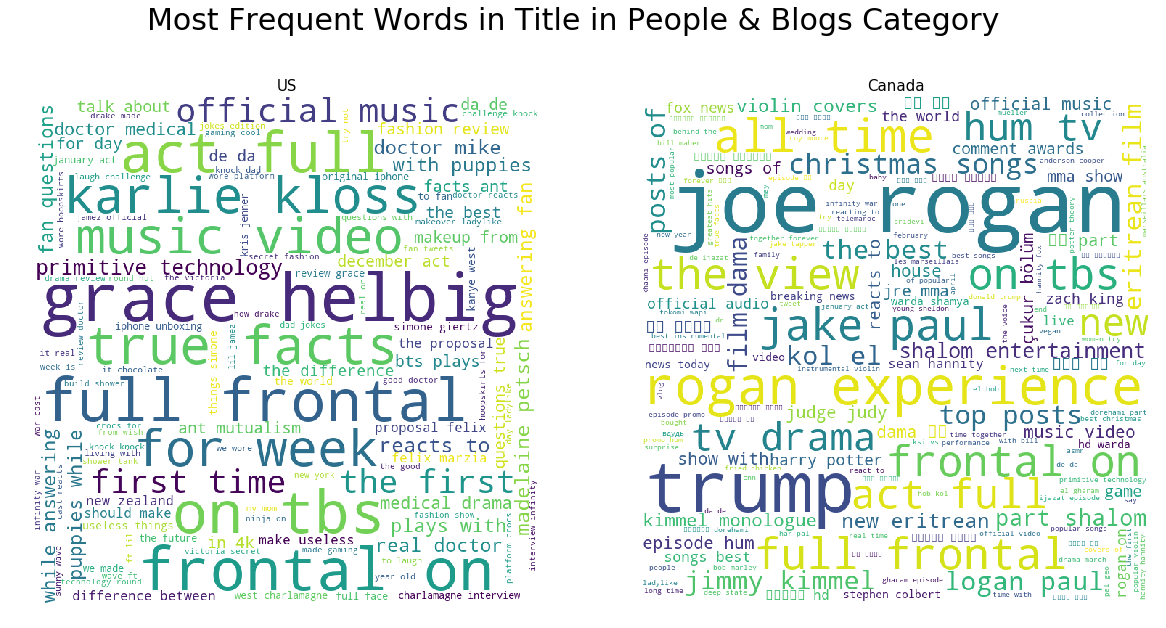

In [173]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Most Frequent Words in Title in People & Blogs Category', fontsize=30)

axs[0].imshow(wordcloud_us) 
axs[0].axis("off")
axs[0].set_title('US', fontsize=15)
axs[1].imshow(wordcloud_ca) 
axs[1].axis("off")
axs[1].set_title('Canada', fontsize=15)
  
plt.show() 

**_Interestingly, Canadian talks more about US politics than the US! Especially, you can see the big letter TRUMP on Canadian side, and also names of comedian such as Joe Rogan. In both chart, we can find Frontal On, which is a news satire TV program._**

## 4. Conclusion

From this analysis, I have found a few things exciting. The highest viewed or liked videos are mostly music videos. And also, music videos of BTS, a Korean boy band, were viral in both countries, the US and Canada. <br><br>
Additionally, it was fascinating to see that the most disliked videos in US YouTube were mainly composed of daily life videos. In contrast, the most disliked videos in Canada was mainly composed of politics and news. And I also found Korean news among the top 10 the most disliked videos in Canada. <br><br>
Lastly, the word cloud was very fun. It seems like Canadians are very interested in American politics (I mean, who would not? The 2020 presidential debate was so much fun!)